In [3]:
import pandas as pd
import numpy as np

import missingno as msno
print("Setup complete")

file = "cars.data"

Setup complete


In [4]:
def create_numpy_arr(file1):
    data = np.genfromtxt(file1, delimiter=',')
    return data

def create_data_frame(file1):
    header = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
    df1 = pd.read_csv(file1, names=header, low_memory=False, na_values="?")
    return df1

df = create_data_frame(file)
df_np = create_numpy_arr(file)

<Axes: >

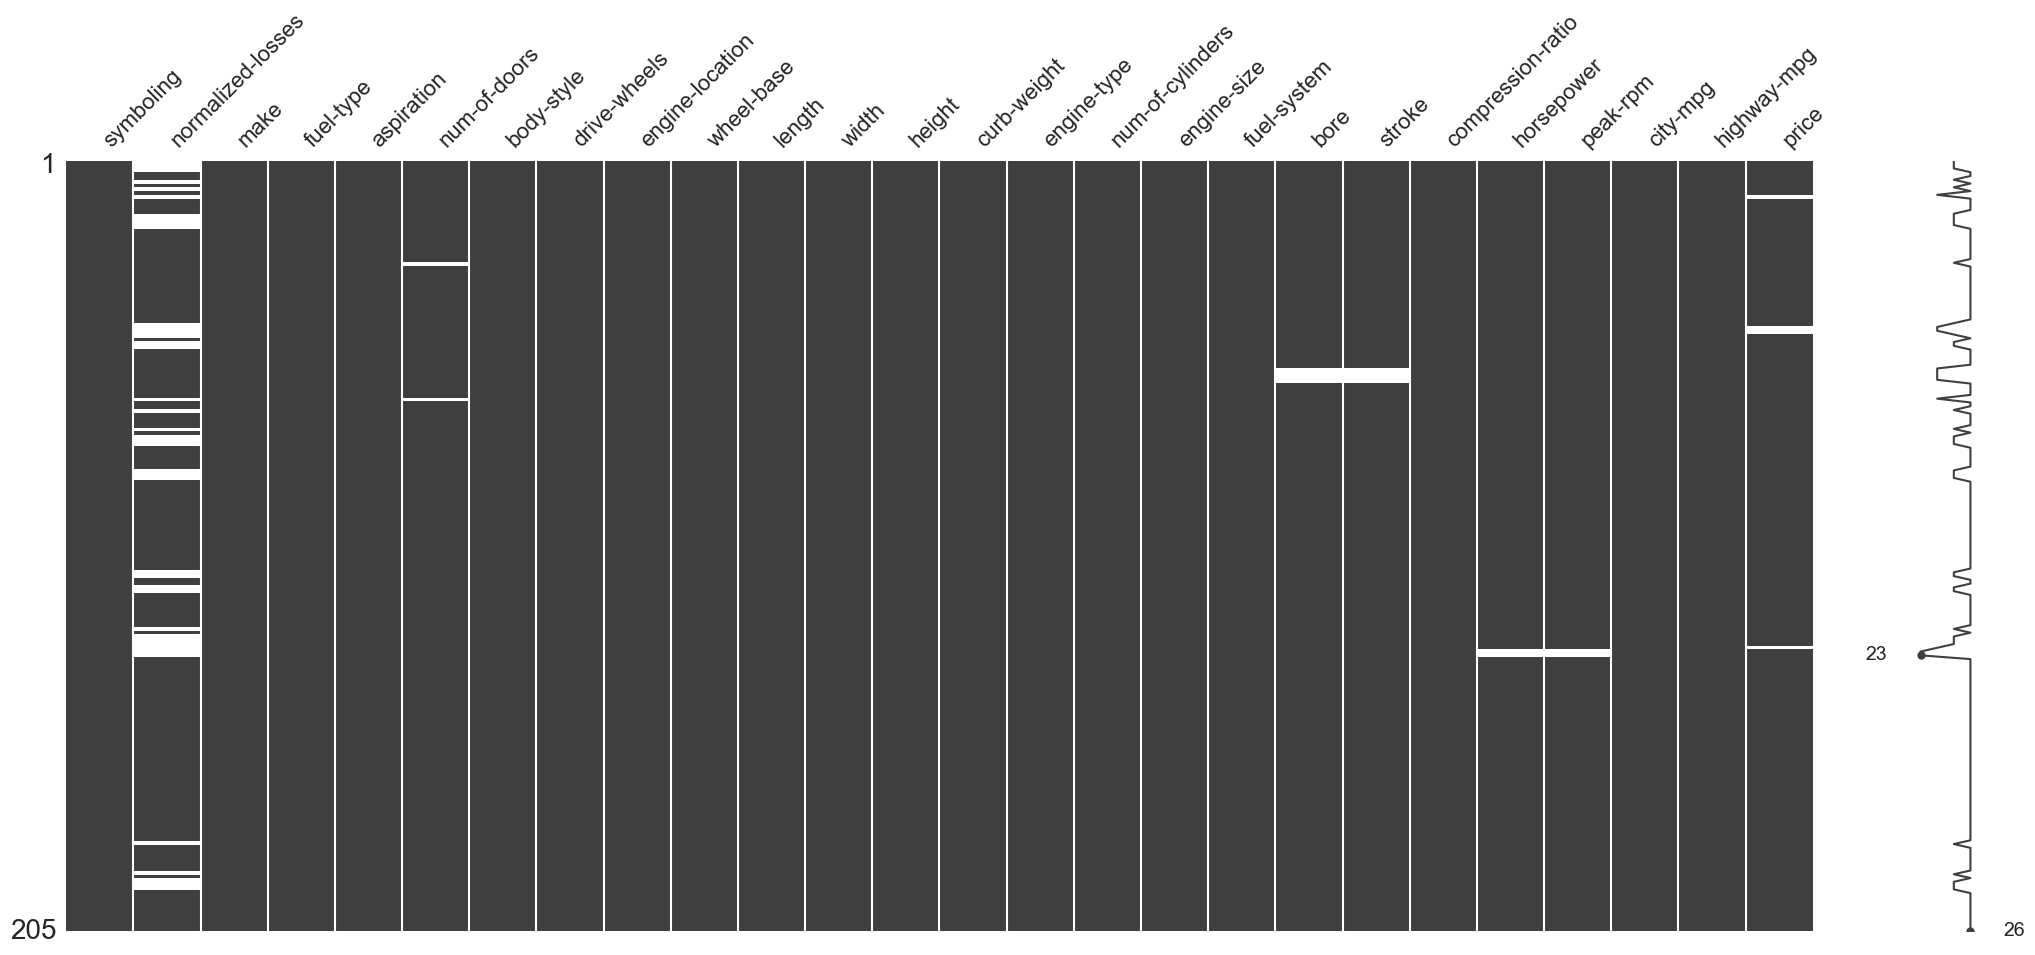

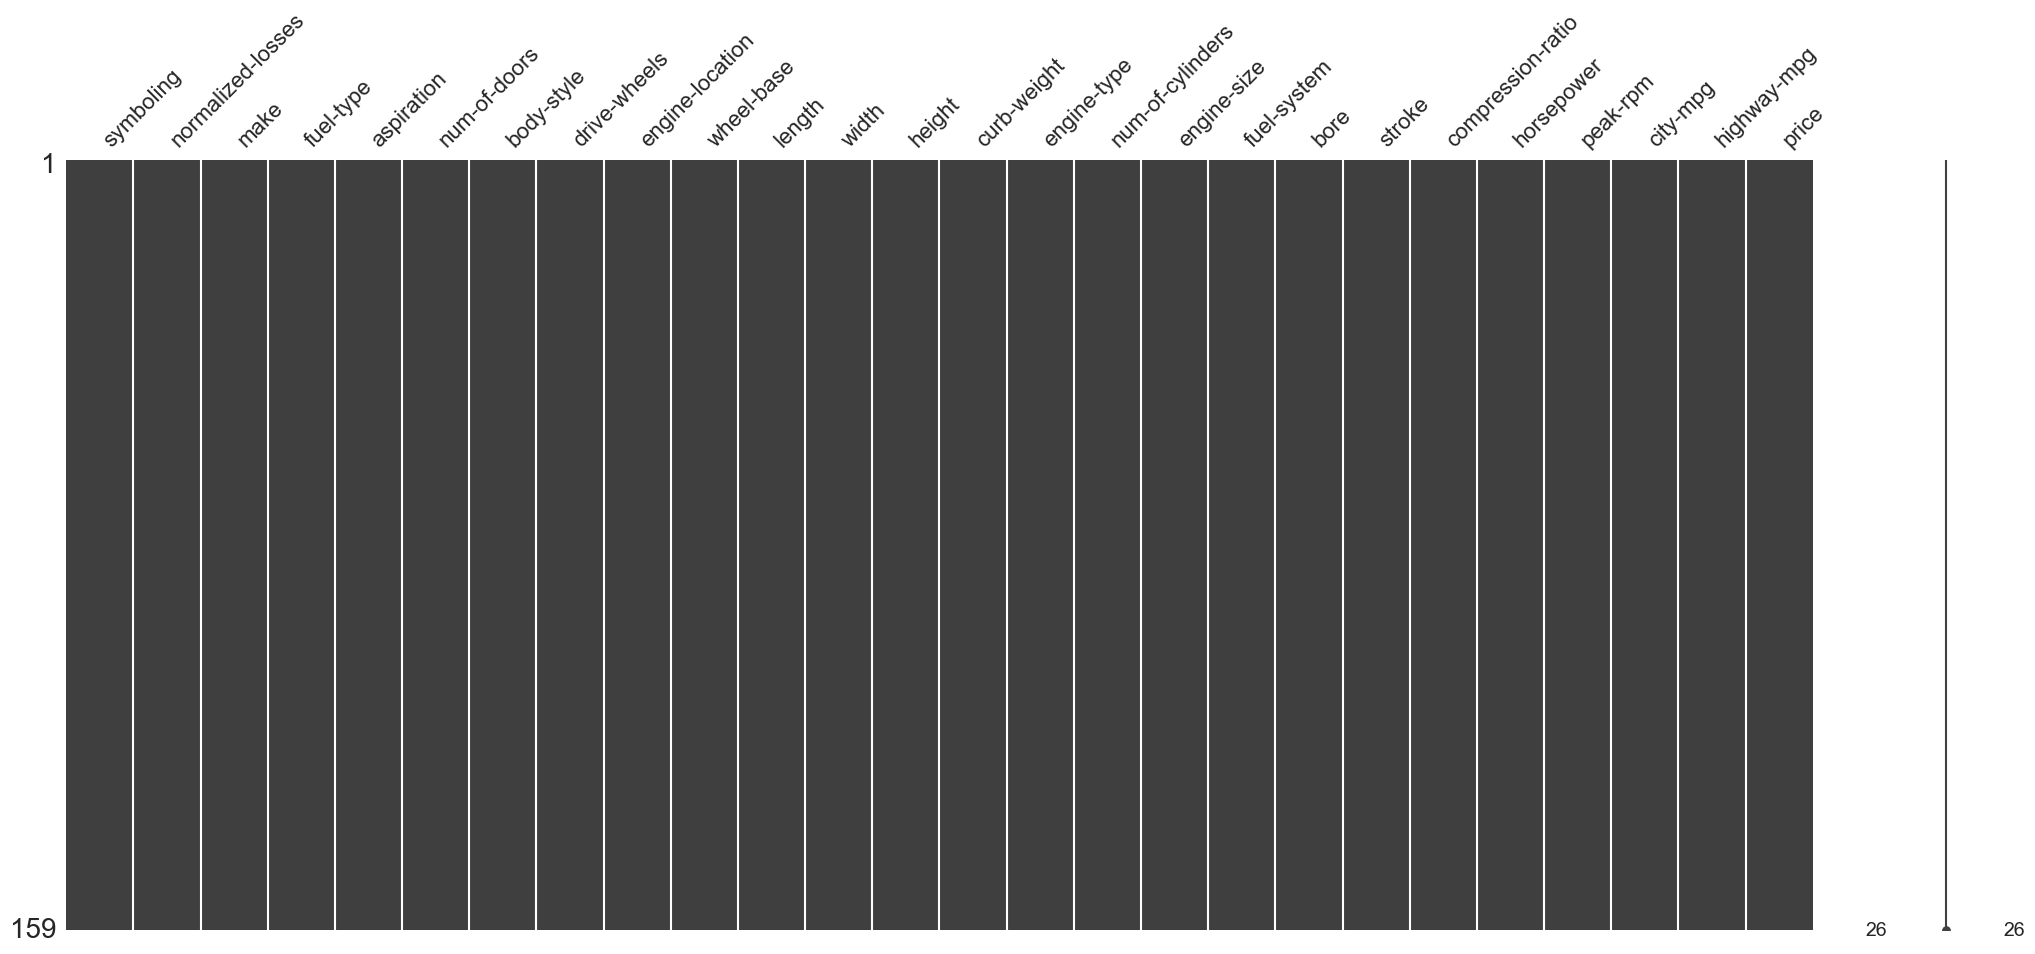

In [5]:
msno.matrix(df)

df = df.dropna(subset=['num-of-doors', 'stroke', 'bore', 'normalized-losses'] )
msno.matrix(df)

In [6]:
import matplotlib.pyplot as plt

def normalize_dataset(dataset):
    normalized_dataset = dataset.copy()
    for column in normalized_dataset.columns:
        if normalized_dataset[column].dtype in ['int64', 'float64']:
            # Мін-Макс нормалізація
            min_value = normalized_dataset[column].min()
            max_value = normalized_dataset[column].max()
            normalized_dataset[column] = (normalized_dataset[column] - min_value) / (max_value - min_value)
    return normalized_dataset

df_normalized = normalize_dataset(df)
# df = normalize_dataset(df)


In [7]:
def plot_histogram(dataset, attribute, num_bins=10):
    min_value = dataset[attribute].min()
    max_value = dataset[attribute].max()
    bin_width = (max_value - min_value) / num_bins
    bins = [min_value + i * bin_width for i in range(num_bins + 1)]
    
    plt.hist(dataset[attribute], bins=bins, edgecolor='black')
    
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.show()

def plot_attribute_relation(dataset, x_attribute, y_attribute,):
    sns.regplot(data=dataset ,x=x_attribute , y=y_attribute)
    
    plt.title(f'{y_attribute} vs {x_attribute}')
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.grid(True)
    
    plt.show()

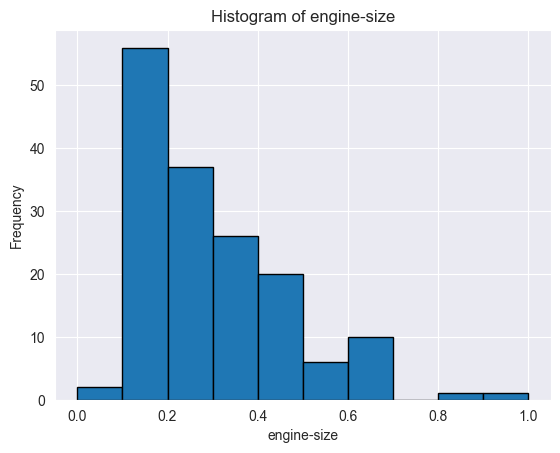

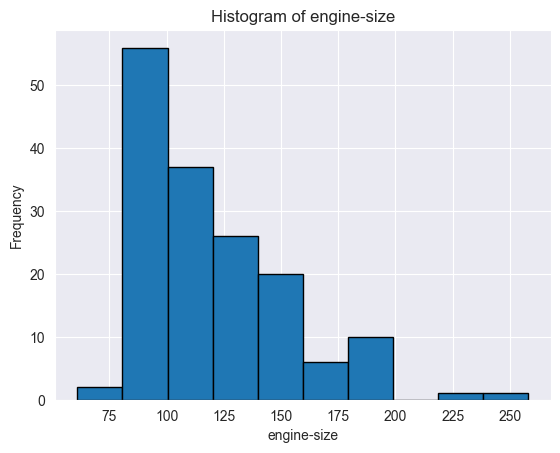

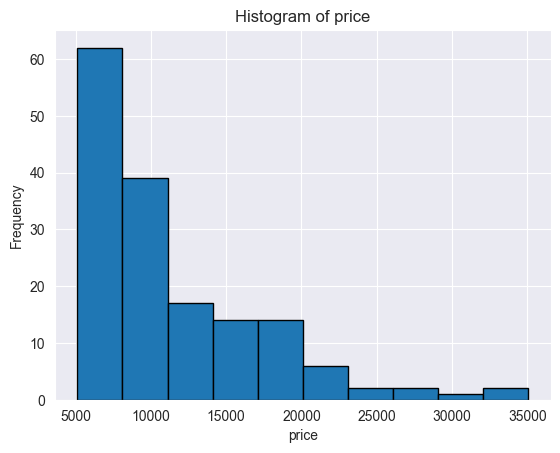

NameError: name 'sns' is not defined

In [8]:
plot_histogram(df_normalized, 'engine-size', num_bins=10)

plot_histogram(df, 'engine-size', num_bins=10)
plot_histogram(df, 'price', num_bins=10)
plot_attribute_relation(df, 'price','engine-size',)

plot_histogram(df, 'highway-mpg', num_bins=16)
plot_histogram(df, 'horsepower', num_bins=16)
plot_attribute_relation(df, 'highway-mpg','horsepower')

In [9]:
from scipy.stats import pearsonr, spearmanr

def calculate_correlation(dataset, x_attribute, y_attribute):
    x_values = dataset[x_attribute]
    y_values = dataset[y_attribute]
    
    pearson_corr, _ = pearsonr(x_values, y_values)
    
    spearman_corr, _ = spearmanr(x_values, y_values)

    print(f"Correlation coefficient: {x_attribute}, {y_attribute}")
    print("\tPearson:", pearson_corr)
    print("\tSpearman:", spearman_corr,'\n')

    return pearson_corr, spearman_corr

calculate_correlation(df, 'engine-size', 'price')
calculate_correlation(df, 'horsepower', 'highway-mpg')

calculate_correlation(df, 'peak-rpm', 'horsepower')
calculate_correlation(df, 'horsepower', 'curb-weight')

Correlation coefficient: engine-size, price
	Pearson: 0.8414956026114566
	Spearman: 0.8664906588599569 

Correlation coefficient: horsepower, highway-mpg
	Pearson: -0.8279410511954653
	Spearman: -0.8986415940120215 

Correlation coefficient: peak-rpm, horsepower
	Pearson: 0.07405682424750931
	Spearman: 0.07450538804918076 

Correlation coefficient: horsepower, curb-weight
	Pearson: 0.7900953915415863
	Spearman: 0.821370989604657 



(0.7900953915415863, 0.821370989604657)

In [14]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_categorical(dataset, categorical_columns1):
    
    categorical_data = dataset[categorical_columns1]

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    onehot_encoded = encoder.fit_transform(categorical_data)


    encoder.fit(categorical_data)
    
    encoded_data = encoder.transform(categorical_data)
    
    encoded_columns = encoder.get_feature_names_out(categorical_columns1)
    print(encoded_columns)
    
    encoded_df1 = df.drop(columns=categorical_columns1, axis=1)

    encoded_df1.loc[:, encoded_columns] = encoded_data

    return encoded_df1

categorical_columns = ['fuel-type', 'drive-wheels', 'body-style', 'make', 'aspiration', 
                       'num-of-doors', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
encoded_df = one_hot_encode_categorical(df, categorical_columns)
print(encoded_df.head())

['fuel-type_diesel' 'fuel-type_gas' 'drive-wheels_4wd' 'drive-wheels_fwd'
 'drive-wheels_rwd' 'body-style_convertible' 'body-style_hardtop'
 'body-style_hatchback' 'body-style_sedan' 'body-style_wagon' 'make_audi'
 'make_bmw' 'make_chevrolet' 'make_dodge' 'make_honda' 'make_jaguar'
 'make_mazda' 'make_mercedes-benz' 'make_mitsubishi' 'make_nissan'
 'make_peugot' 'make_plymouth' 'make_porsche' 'make_saab' 'make_subaru'
 'make_toyota' 'make_volkswagen' 'make_volvo' 'aspiration_std'
 'aspiration_turbo' 'num-of-doors_four' 'num-of-doors_two'
 'engine-location_front' 'engine-type_dohc' 'engine-type_l'
 'engine-type_ohc' 'engine-type_ohcf' 'engine-type_ohcv'
 'num-of-cylinders_eight' 'num-of-cylinders_five' 'num-of-cylinders_four'
 'num-of-cylinders_six' 'num-of-cylinders_three' 'fuel-system_1bbl'
 'fuel-system_2bbl' 'fuel-system_idi' 'fuel-system_mfi' 'fuel-system_mpfi'
 'fuel-system_spdi']
    symboling  normalized-losses  wheel-base  length  width  height  \
3           2              164

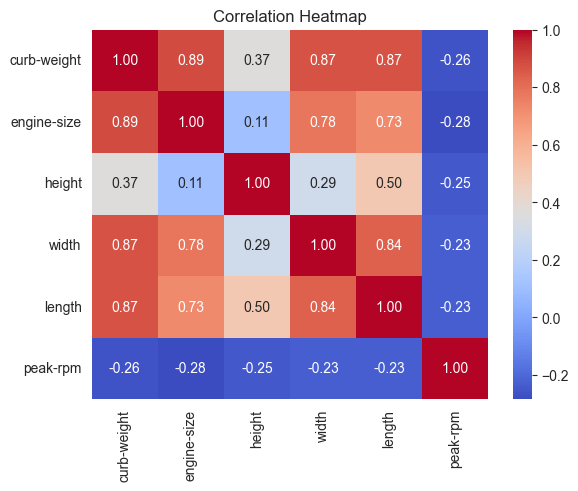

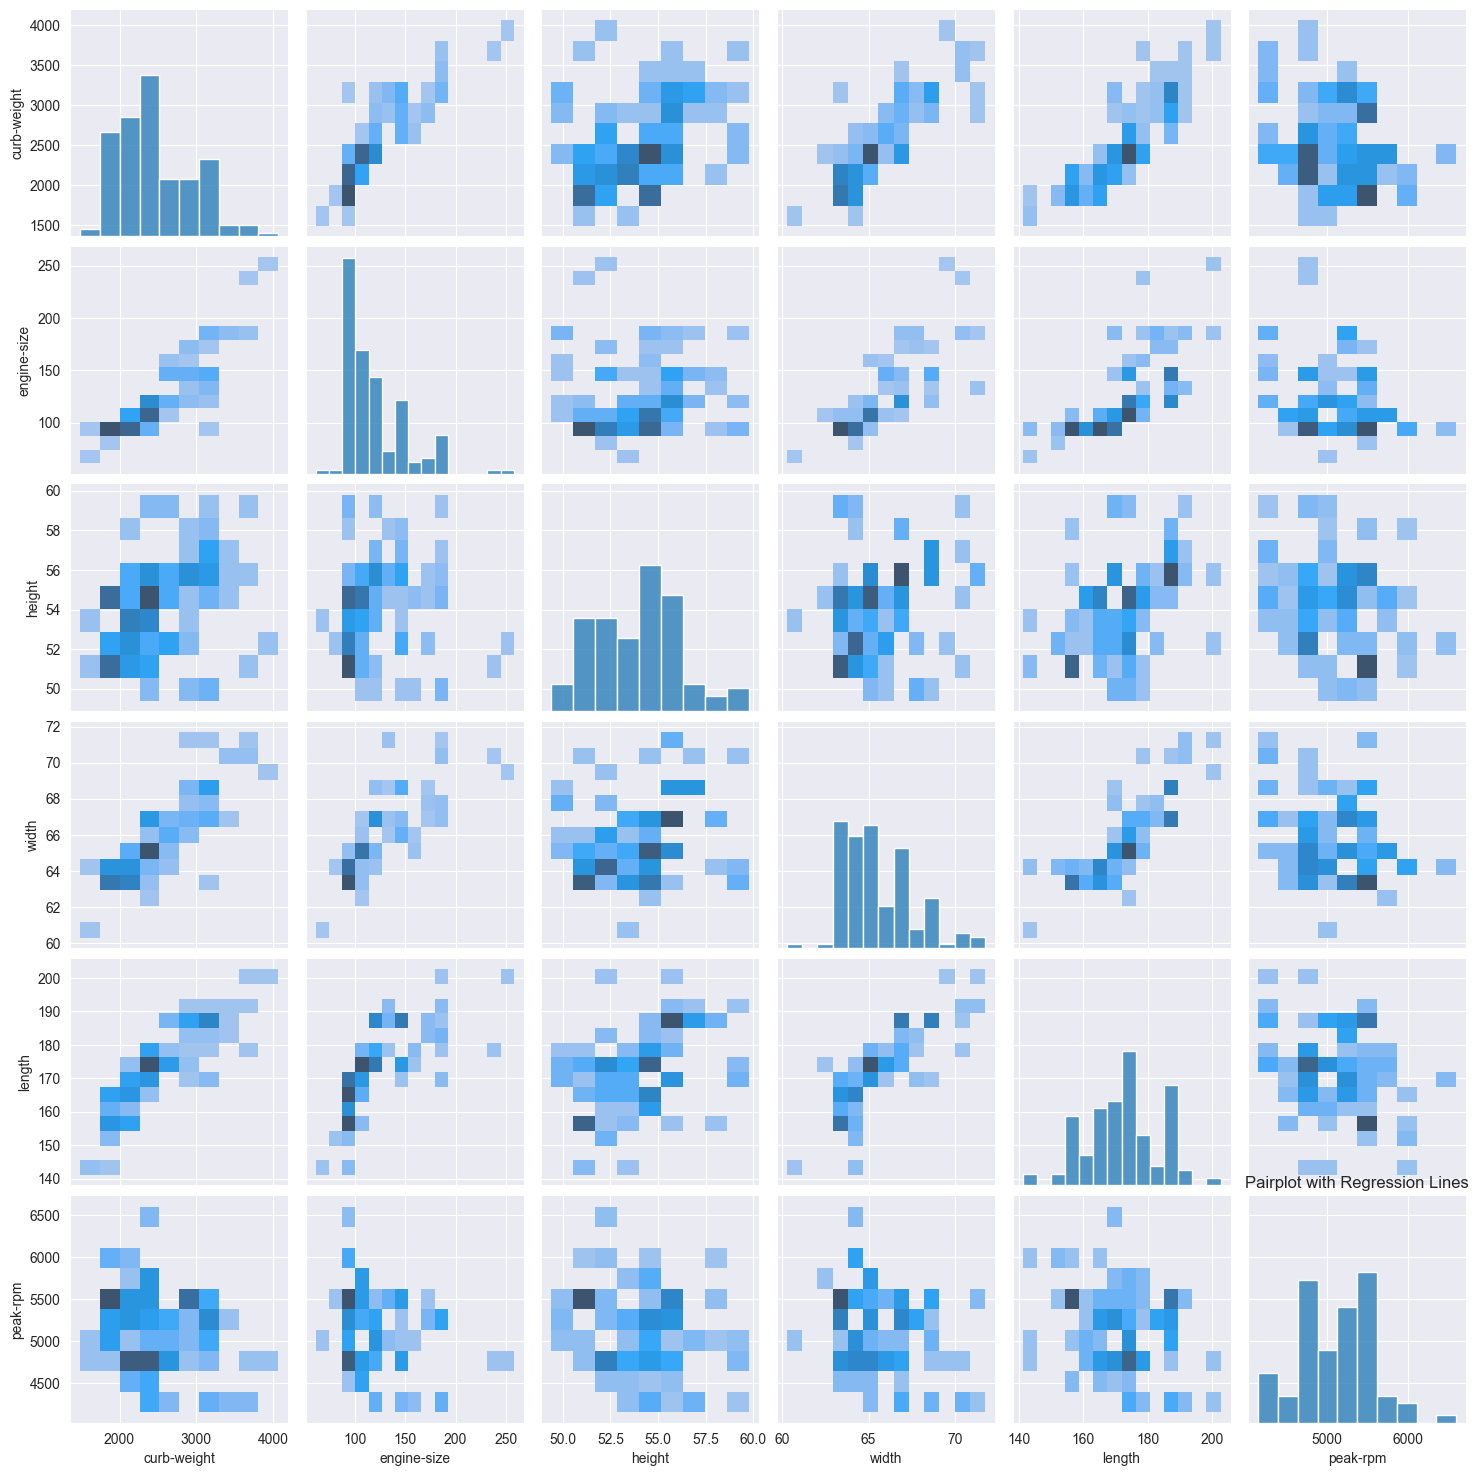

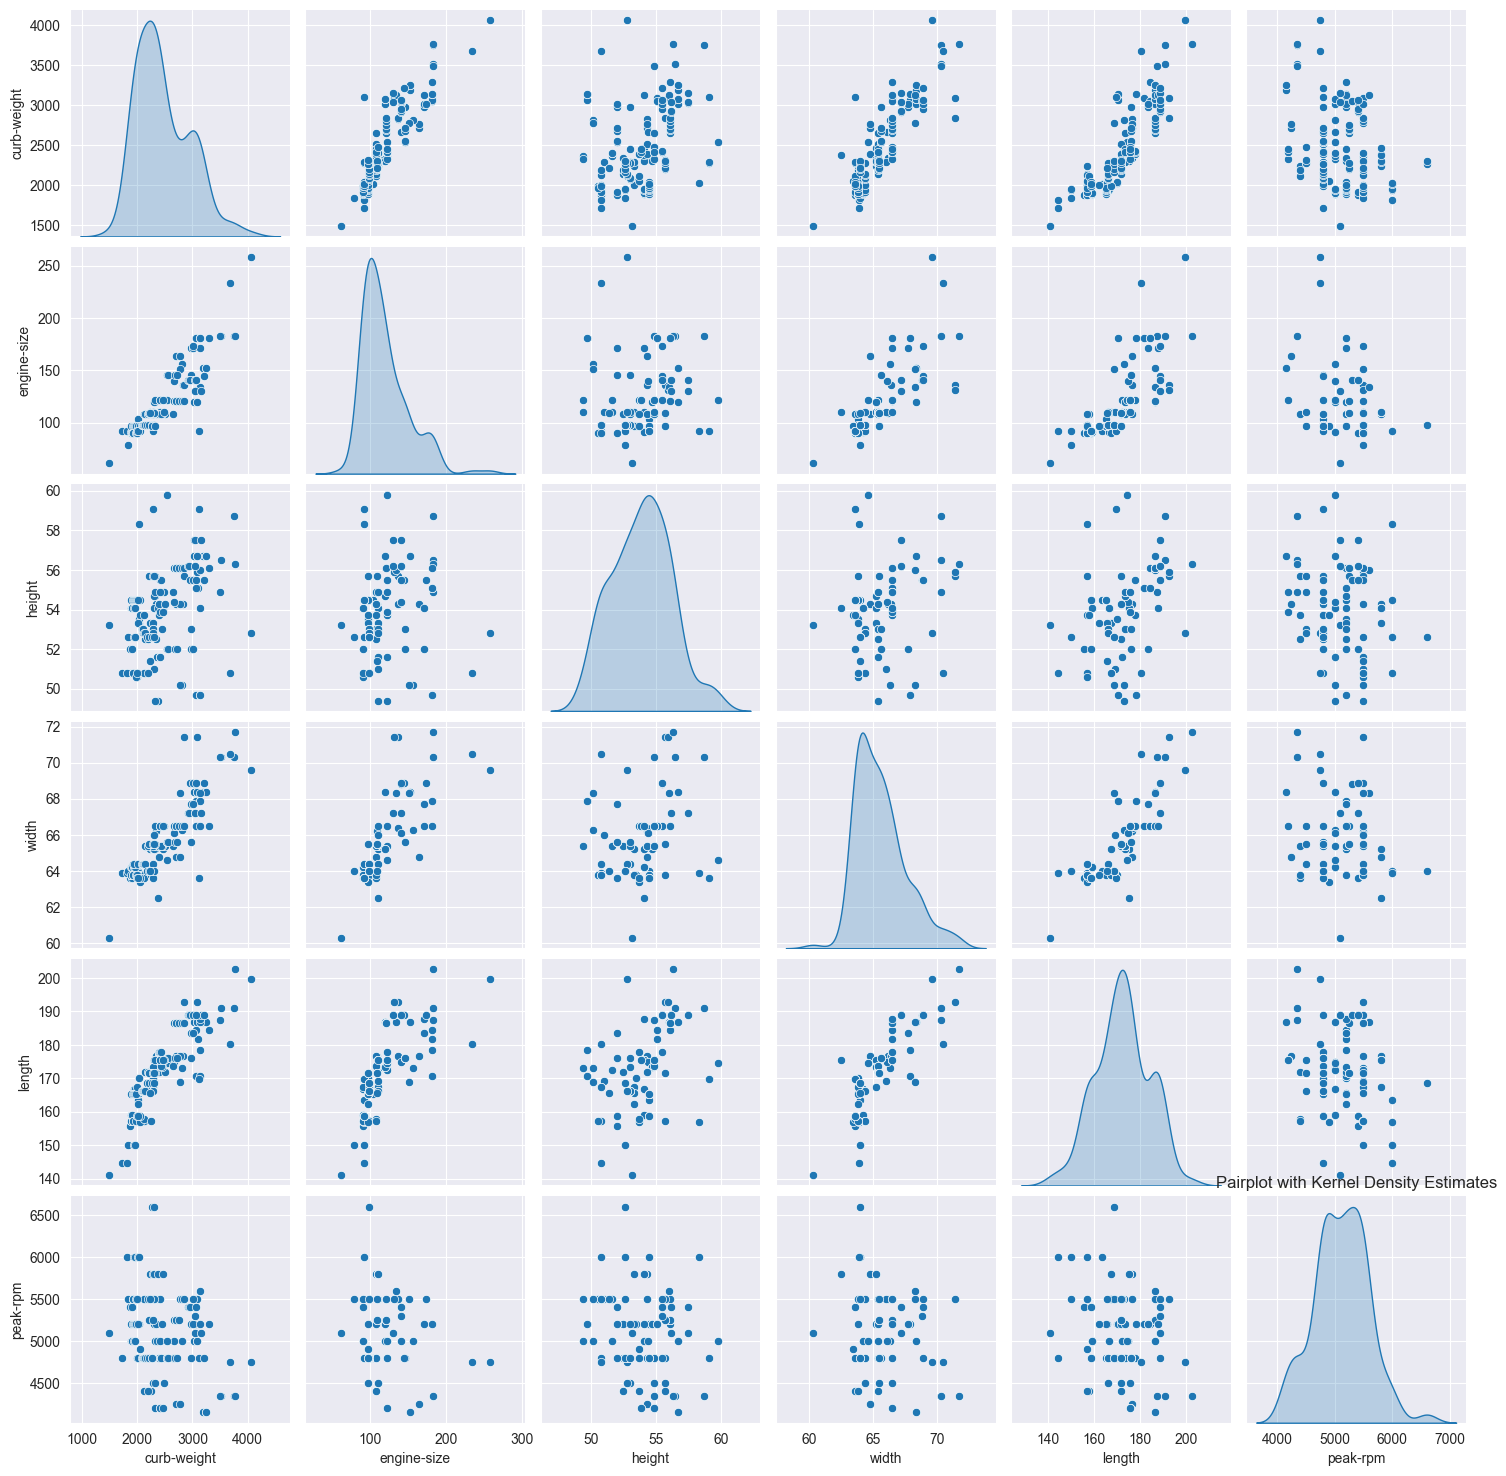

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_test = encoded_df[['curb-weight', 'engine-size', 'height', 'width', 'length', 'peak-rpm']]

corr = encoded_df[['curb-weight', 'engine-size', 'height', 'width', 'length', 'peak-rpm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df_test, kind='hist')
plt.title('Pairplot with Regression Lines')
plt.show()

sns.pairplot(df_test, diag_kind='kde')
plt.title('Pairplot with Kernel Density Estimates')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_train, df_test = train_test_split(df, test_size=0.5, random_state=42)

def train_and_evaluate_regression_model(feature, target, df_train1, df_test1):

    X_train = df_train1[feature]
    y_train = df_train1[target]

    X_test = df_test1[feature]
    y_test = df_test1[target]
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Squared Error:", mse)
  
    print("Coefficients: \n", model.coef_)
    print("Coefficient of determination: %.2f" % r2)

    if len(feature) == 1:
        plt.scatter(X_train, y_train, label='Data')
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title('Linear Regression Model')
        plt.text(0.02, 0.8, f'MSE: {mse:.5f}', transform=plt.gca().transAxes, fontsize=12)
        plt.text(0.02, 0.7, f'r2: {r2}', transform=plt.gca().transAxes, fontsize=12)
        plt.text(0.02, 0.6, f'cof: {model.coef_[0]:.5f}', transform=plt.gca().transAxes, fontsize=12)
        plt.legend()
        plt.show()

    return model

Mean Squared Error: 11930968.401335947
Coefficients: 
 [159.04694016]
Coefficient of determination: 0.61


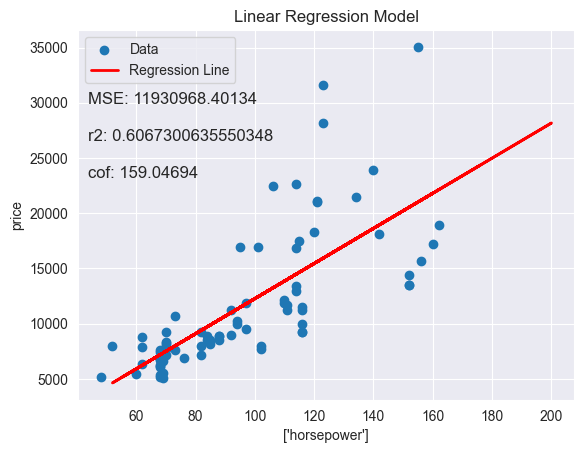

Mean Squared Error: 29823152.876904316
Coefficients: 
 [-2.86394133]
Coefficient of determination: 0.02


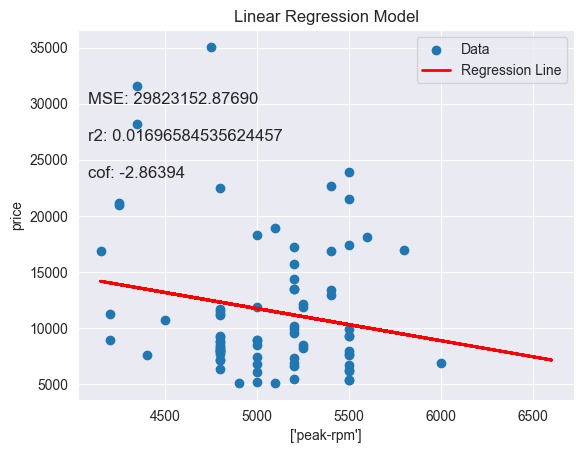

Mean Squared Error: 4890313.602621987
Coefficients: 
 [ 73.8717073   -8.61445051  -2.54440182   7.38295823 117.50923776]
Coefficient of determination: 0.84


LinearRegression()

In [13]:
train_and_evaluate_regression_model(['horsepower'], 'price', df_train, df_test)
train_and_evaluate_regression_model(['peak-rpm'], 'price', df_train, df_test)
train_and_evaluate_regression_model(['engine-size','horsepower','highway-mpg', 'curb-weight', 'symboling'], 'price', df_train, df_test)